In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'white'

In [2]:
df = pd.read_csv("./data.csv", header=None)
df

,0,1,2,3
0,native,768,2250.696,9.346100e+03
1,native_with_size_hint,768,2263.284,2.634854e+05
2,simd,768,401.186,4.944740e+01
3,simd_unrolled4,768,123.000,1.302000e+02
4,native_par,768,162908.729,4.928506e+09
...,...,...,...,...
2187,simd_unrolled4,240384,83604.400,6.705544e+06
2188,native_par,240384,659438.327,7.594929e+11
2189,simd_par,240384,285267.889,5.051758e+10
2190,simd_par_better,240384,84651.560,5.780280e+06


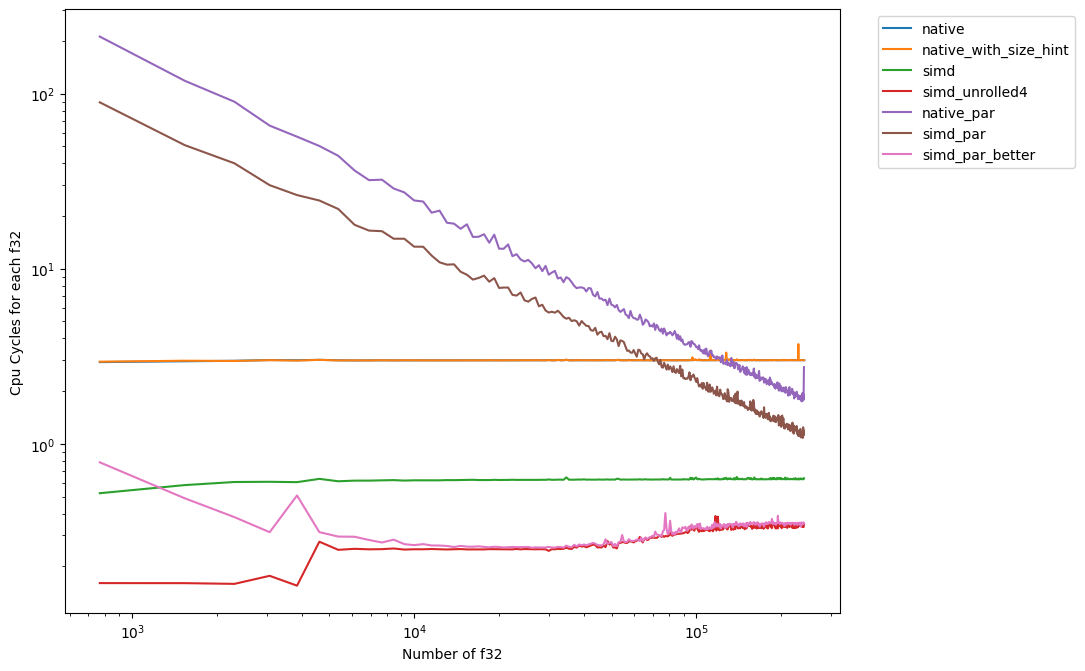

In [3]:
plt.figure(figsize=(10, 8), dpi=100)
for name in df[0].unique():
    data = df[df[0] == name]
    
    plt.plot(
        data[1],
        data[2] / data[1],
        label=name
    )
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Cpu Cycles for each f32")
plt.xlabel("Number of f32")
plt.show()